### Uppgift 1 - Landstatistik

Ni får ett land tilldelat till er grupp. Börja med att anonymisera kolumnen med idrottarnas namn med
hashfunktionen SHA-256.  

Undersök därefter hur det gått för landet i OS genom tiderna. Visualisera exempelvis:  
- de sporter landet fått flest medaljer i
- antal medaljer per OS
- histogram över åldrar
- Skapa fler plots för att visualisera flera aspekter kring ert land och dess sportprestationer i OS.

In [1]:
import hashlib as hl
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
athlete_events = pd.read_csv("../Projekt-OS-Italien/Data/athlete_events.csv")

In [3]:
# Börja med att anonymisera kolumnen med idrottarnas namn med
# hashfunktionen SHA-256.  

athlete_events["Name"] = athlete_events["Name"].apply(lambda name: hl.sha256(name.encode()).hexdigest())
athlete_events.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,3a4eef48434c66b3f14ab0221f6762d0ef7c6135ab2790...,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,a6430cc6630934275dc6283f7e97e9625e6587cdddec7a...,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,9c198b205332c2c8e1542e0f9534b9e270780a41d978ec...,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,0a477bb1c5ad39716f9c775e54d18d16aa8b37ada55548...,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,5b7be356aa28178096dc6747f0b8e4e393eaceb5f95310...,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


#### Undersök därefter hur det gått för Italien i OS genom tiderna. Visualisera exempelvis:  

In [4]:
athlete_events.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [5]:
# de sporter landet fått flest medaljer i

medals = athlete_events.query("Medal == 'Gold' or Medal == 'Silver' or Medal == 'Bronze'")
italy_medals = medals.query("Team == 'Italy'")

italy_medals.value_counts("Medal")


Medal
Gold      535
Silver    508
Bronze    484
Name: count, dtype: int64

In [6]:
italy_medals_count = italy_medals.value_counts("Sport")

### Conclusion

Italy has won the most medals in Fencing, Rowing, Cycling, and Water Polo.

In [7]:
px.bar(
    italy_medals_count,
    title="Italy medals",
    labels={"value": "Number of medals", 
            "variable": "Medals", 
            "count": "Number of medals"},
    template="simple_white"
    )

In [8]:
italy_medals.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,1c1026605c0607937a724d3d839d964064f6907b3b2e0e...,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
214,103,5a52f67df03607d3096242e2779913d915ccb30d26438f...,M,25.0,NaN,NaN,Italy,ITA,1936 Summer,1936,Summer,Berlin,Modern Pentathlon,Modern Pentathlon Men's Individual,Bronze
218,106,e54ebcdcbc9a487cea464c1def380df0dc1ea3d7f4ba83...,M,22.0,188.0,96.0,Italy,ITA,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Quadruple Sculls,Gold
219,106,e54ebcdcbc9a487cea464c1def380df0dc1ea3d7f4ba83...,M,29.0,188.0,96.0,Italy,ITA,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Double Sculls,Gold
220,106,e54ebcdcbc9a487cea464c1def380df0dc1ea3d7f4ba83...,M,34.0,188.0,96.0,Italy,ITA,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Quadruple Sculls,Gold


In [9]:
# antal medaljer per OS

medals_per_game = italy_medals.groupby("Year")[["Season"]].value_counts()
medals_per_game

Year  Season
1900  Summer      5
1906  Summer      9
1908  Summer      8
1912  Summer     25
1920  Summer     84
1924  Summer     51
1928  Summer     72
1932  Summer     77
1936  Summer     70
1948  Summer     67
      Winter      1
1952  Summer     52
      Winter      2
1956  Summer     45
1960  Summer     85
      Winter      1
1964  Summer     51
1968  Summer     33
      Winter      2
1972  Summer     25
      Winter      3
1976  Summer     31
      Winter      4
1980  Summer     37
      Winter      1
1984  Summer     63
      Winter      2
1988  Summer     29
      Winter      8
1992  Summer     45
      Winter     19
1994  Winter     26
1996  Summer     71
1998  Winter     15
2000  Summer     65
2002  Winter     19
2004  Summer    104
2006  Winter     21
2008  Summer     42
2010  Winter      5
2012  Summer     68
2014  Winter     14
2016  Summer     70
Name: count, dtype: int64

Text(0.5, 1.0, 'Italy medals by year')

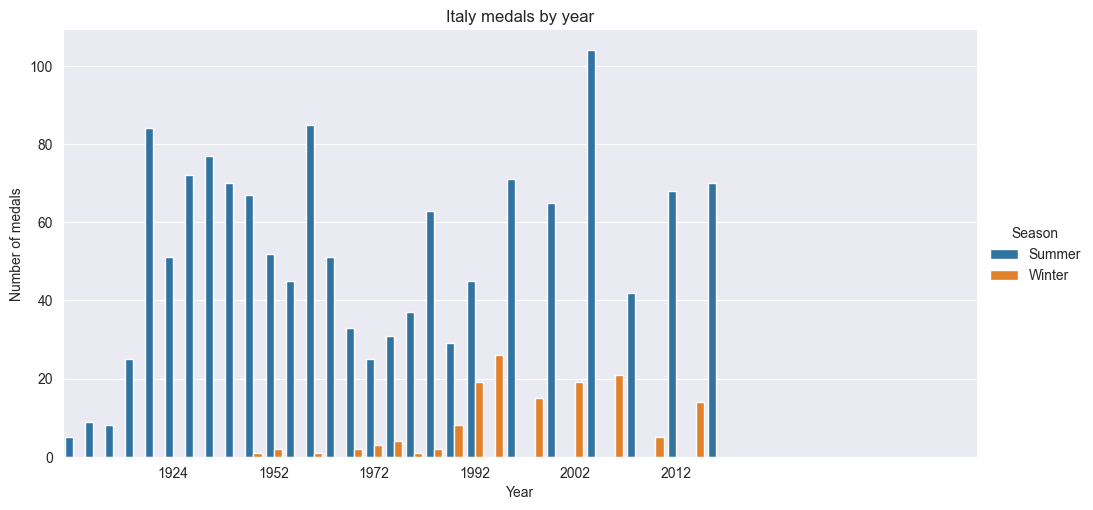

In [16]:
sns.set_style('darkgrid')
sns.catplot(x='Year', kind = 'count', hue = 'Season', data = italy_medals, aspect=2)
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45])
plt.ylabel("Number of medals")
plt.title("Italy medals by year")

# sns.set_style('darkgrid')
# sns.catplot(x='Age', kind = 'count', hue = 'Sex', data = medals_per_game)
# 

# I Got a phone call, so my audio disconnected and Teams crashed. Rebooting phone, will be back soon.

In [ ]:
# histogram över åldrar

Skapa fler plots för att visualisera flera aspekter kring ert land och dess sportprestationer i OS.